In [275]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fetch data for a stock (AAPL - Apple)
stock_symbol = "AAPL"
df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")

# Display the first few rows



[*********************100%***********************]  1 of 1 completed


In [276]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320436,24.789806,23.879985,24.778683,212818400
2015-01-05,23.635290,24.169170,23.448433,24.089088,257142000
2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600
2015-01-08,24.889902,24.947740,24.180287,24.298187,237458000
...,...,...,...,...,...
2023-12-22,192.444580,194.243775,191.818335,194.015137,37122800
2023-12-26,191.897888,192.732871,191.679200,192.454544,28919300


In [277]:
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

In [278]:
df.shape

(2264, 7)

In [279]:
df.isna().sum()

Price   Ticker
Close   AAPL       0
High    AAPL       0
Low     AAPL       0
Open    AAPL       0
Volume  AAPL       0
SMA_10             9
SMA_50            49
dtype: int64

In [280]:
df

Price,Close,High,Low,Open,Volume,SMA_10,SMA_50
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2015-01-02,24.320436,24.789806,23.879985,24.778683,212818400,NaN,NaN
2015-01-05,23.635290,24.169170,23.448433,24.089088,257142000,NaN,NaN
2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400,NaN,NaN
2015-01-07,23.968960,24.069062,23.735387,23.846612,160423600,NaN,NaN
2015-01-08,24.889902,24.947740,24.180287,24.298187,237458000,NaN,NaN
...,...,...,...,...,...,...,...
2023-12-22,192.444580,194.243775,191.818335,194.015137,37122800,194.578775,184.200590
2023-12-26,191.897888,192.732871,191.679200,192.454544,28919300,194.565855,184.487574


In [281]:
df['Prev_Close'] = df['Close'].shift(1)

In [282]:
df['Daily_Change'] = df.Close.AAPL - df['Prev_Close']

In [283]:
df.dropna(inplace=True) 

In [284]:
df

Price,Close,High,Low,Open,Volume,SMA_10,SMA_50,Prev_Close,Daily_Change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2015-03-16,27.904795,27.904795,27.440274,27.665834,143497200,28.089931,26.677913,27.601065,0.303730
2015-03-17,28.371552,28.434083,28.061126,28.116958,204092400,28.038120,26.758935,27.904795,0.466757
2015-03-18,28.690912,28.845009,28.221924,28.362620,261083600,28.036557,26.860048,28.371552,0.319361
2015-03-19,28.474279,28.865103,28.451947,28.753439,183238000,28.060900,26.956783,28.690912,-0.216633
2015-03-20,28.116955,28.675272,27.951693,28.641775,274780400,28.045267,27.039743,28.474279,-0.357325
...,...,...,...,...,...,...,...,...,...
2023-12-22,192.444580,194.243775,191.818335,194.015137,37122800,194.578775,184.200590,193.518127,-1.073547
2023-12-26,191.897888,192.732871,191.679200,192.454544,28919300,194.565855,184.487574,192.444580,-0.546692


In [285]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure no missing values
df.dropna(inplace=True)

# Define Features and Target
features = ['SMA_10', 'SMA_50', 'Prev_Close', 'Daily_Change']  # Features used for prediction
target = 'Close'  # Target variable (Stock Price)

X = df[features]
y = df[target]

# Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

# Standardize Features (optional for better convergence)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 1772, Testing samples: 443


In [286]:
from sklearn.linear_model import LinearRegression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make Predictions
y_pred_lr = lr_model.predict(X_test)


In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Errors
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Linear Regression - Root Mean Squared Error (RMSE): {rmse_lr:.2f}")


Linear Regression - Mean Absolute Error (MAE): 0.00
Linear Regression - Root Mean Squared Error (RMSE): 0.00


In [288]:
y_test

Ticker,AAPL
Date,
2022-03-28,172.800064
2022-03-29,176.106476
2022-03-30,174.935440
2022-03-31,171.825806
2022-04-01,171.530594
...,...
2023-12-22,192.444580
2023-12-26,191.897888
2023-12-27,191.997253


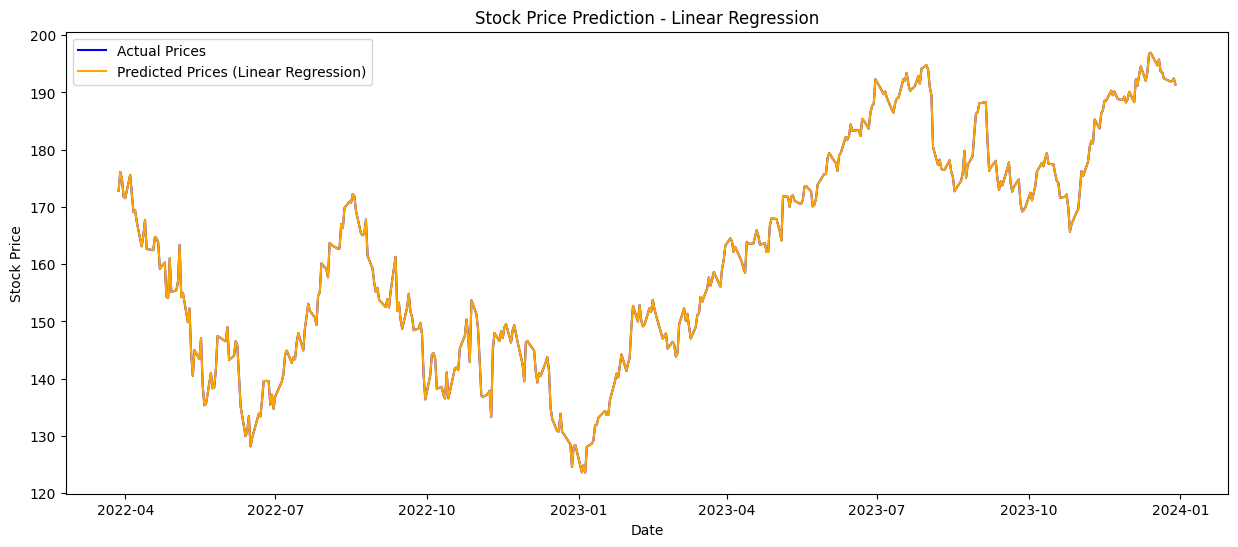

In [289]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label="Actual Prices", color='blue')
plt.plot(y_test.index, y_pred_lr, label="Predicted Prices (Linear Regression)", color='orange')
plt.legend()
plt.title("Stock Price Prediction - Linear Regression")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()
